In [1]:
# !/usr/bin/env python3
# 百度百科QA数据分析

In [2]:
import json
import os
import numpy as np
import jieba
import json

In [3]:
trainfile = './baike_qa2019/baike_qa_train.json'
valfile = './baike_qa2019/baike_qa_valid.json'
train_list = []
val_list = []
cats_list = []

In [4]:
with open(trainfile, 'r', encoding='utf8') as f:
    for line in f.readlines():
        if line is None or len(line) == 0:
            continue
        j_info = json.loads(line)
        train_list.append(j_info)

In [5]:
with open(valfile, 'r', encoding='utf8') as f:
    for line in f.readlines():
        if line is None or len(line) == 0:
            continue
        j_info = json.loads(line)
        val_list.append(j_info)

In [6]:
# 训练QA数据
print('====> 训练QA数据:\t', len(train_list))
print(train_list[0])
print('\n')
print('====> 验证集数据:\t', len(val_list))
print(val_list[0])

====> 训练QA数据:	 1425170
{'qid': 'qid_5982723620932473219', 'category': '教育/科学-理工学科-地球科学', 'title': '人站在地球上为什么没有头朝下的感觉 ', 'desc': '', 'answer': '地球上重力作用一直是指向球心的，因此\r\n只要头远离球心，人们就回感到头朝上。'}


====> 验证集数据:	 44972
{'qid': 'qid_1815059893214501395', 'category': '烦恼-恋爱', 'title': '请问深入骨髓地喜欢一个人怎么办我不能确定对方是不是喜欢我，我却想 ', 'desc': '我不能确定对方是不是喜欢我，我却想分分秒秒跟他在一起，有谁能告诉我如何能想他少一点', 'answer': '一定要告诉他你很喜欢他 很爱他!!  虽然不知道你和他现在的关系是什么！但如果真的觉得很喜欢就向他表白啊！！起码你努力过了！  女生主动多少占一点优势的！！呵呵  只愿曾经拥有！  到以后就算感情没现在这么强烈了也不会觉得遗憾啊~！  与其每天那么痛苦的想他 恋他 还不如直接告诉他 ！  不要怕回破坏你们现有的感情！因为如果不告诉他  你可能回后悔一辈子！！  '}


In [7]:
# 种类分布
import collections
from collections import Counter
import wordcloud

In [8]:
train_cats_list = []
val_cats_list = []

In [9]:
for elem in train_list:
    if 'category' in elem:
        train_cats_list.append(elem['category'])
for elem in val_list:
    if 'category' in elem:
        val_cats_list.append(elem['category'])

In [10]:
train_cats = Counter(train_cats_list)
val_cats = Counter(val_cats_list)

In [11]:
train_cats = sorted(train_cats.items(), key=lambda x: x[1], reverse=True)
val_cats = sorted(val_cats.items(), key=lambda x: x[1], reverse=True)

In [12]:
train_cats

[('游戏-网络游戏', 99561),
 ('娱乐-博彩', 46124),
 ('烦恼-恋爱', 40906),
 ('电脑/网络-互联网-上网帮助', 40499),
 ('商业/理财-股票', 38772),
 ('教育/科学-学习帮助', 31242),
 ('游戏-网易游戏-魔兽世界', 29708),
 ('生活-生活常识', 25144),
 ('电脑/网络-互联网', 22813),
 ('电脑/网络-操作系统/系统故障', 21856),
 ('游戏-久游游戏-魔力宝贝', 19210),
 ('商业/理财-财务税务', 17079),
 ('电脑/网络-软件', 16954),
 ('生活-购物', 16088),
 ('娱乐-幽默滑稽', 15636),
 ('娱乐-度假旅游', 15607),
 ('健康-人体常识', 14733),
 ('商业/理财-基金', 14696),
 ('社会民生-法律', 14654),
 ('教育/科学-理工学科-生物学', 14236),
 ('社会民生-军事', 14094),
 ('电脑/网络-硬件', 13839),
 ('社会民生-其他社会话题', 13764),
 ('教育/科学-理工学科-数学', 13492),
 ('教育/科学-理工学科-工程技术科学', 12792),
 ('生活-美食/烹饪', 12742),
 ('烦恼-两性问题', 12655),
 ('娱乐-星座/运势', 12471),
 ('教育/科学-外语学习', 12423),
 ('游戏-完美游戏-诛仙', 12227),
 ('电脑/网络', 12143),
 ('娱乐-音乐', 11811),
 ('健康', 11584),
 ('文化/艺术-文学', 11296),
 ('烦恼-夫妻', 11123),
 ('游戏-光宇游戏-问道', 11094),
 ('生活-育儿', 10499),
 ('生活-服装/首饰', 10351),
 ('健康-精神心理科', 10248),
 ('健康-医院', 9907),
 ('教育/科学-院校信息', 9593),
 ('健康-肿瘤科', 9191),
 ('健康-妇产科-妇科', 8853),
 ('社会民生-求职就业', 8737),
 ('文化/艺术-书画美术', 86

In [13]:
# 检查训练集合和验证集合的数据种类关系
print('训练集合数据种类:\t', len(train_cats))
print('验证集合数据种类:\t', len(val_cats))

训练集合数据种类:	 388
验证集合数据种类:	 321


In [14]:
# 检查验证集合中是否含有训练集合中没有的种类
val_all_cats = list(val_cats)
train_all_cats = list(train_cats)
for elem in val_all_cats:
    if elem not in train_all_cats:
        print(elem)
        
#训练集内的种类包含了验证集内所有的种类

('游戏-网络游戏', 3086)
('娱乐-博彩', 1576)
('烦恼-恋爱', 1279)
('电脑/网络-互联网-上网帮助', 1277)
('商业/理财-股票', 1268)
('教育/科学-学习帮助', 976)
('游戏-网易游戏-魔兽世界', 942)
('生活-生活常识', 805)
('电脑/网络-操作系统/系统故障', 749)
('电脑/网络-互联网', 729)
('游戏-久游游戏-魔力宝贝', 639)
('电脑/网络-软件', 581)
('商业/理财-财务税务', 527)
('娱乐-度假旅游', 490)
('生活-购物', 488)
('娱乐-幽默滑稽', 484)
('商业/理财-基金', 483)
('社会民生-军事', 472)
('健康-人体常识', 452)
('电脑/网络-硬件', 437)
('生活-美食/烹饪', 436)
('社会民生-法律', 426)
('教育/科学-理工学科-生物学', 422)
('游戏-完美游戏-诛仙', 400)
('社会民生-其他社会话题', 399)
('烦恼-两性问题', 397)
('娱乐-星座/运势', 396)
('教育/科学-理工学科-数学', 396)
('娱乐-音乐', 385)
('健康', 382)
('教育/科学-外语学习', 376)
('教育/科学-理工学科-工程技术科学', 367)
('游戏-光宇游戏-问道', 361)
('生活-育儿', 356)
('电脑/网络', 356)
('烦恼-夫妻', 335)
('健康-医院', 334)
('文化/艺术-文学', 324)
('教育/科学-院校信息', 320)
('健康-精神心理科', 301)
('生活-服装/首饰', 297)
('社会民生-求职就业', 296)
('生活-家居装修', 282)
('健康-肿瘤科', 281)
('育儿-宝宝-婴儿期', 278)
('生活-美容/塑身', 275)
('娱乐-电影', 275)
('健康-妇产科-妇科', 270)
('商业/理财-个人理财', 265)
('生活-保健养生', 265)
('文化/艺术-书画美术', 263)
('游戏-完美游戏-完美国际', 259)
('教育/科学', 259)
('电子数码-手机/通讯', 252)
(

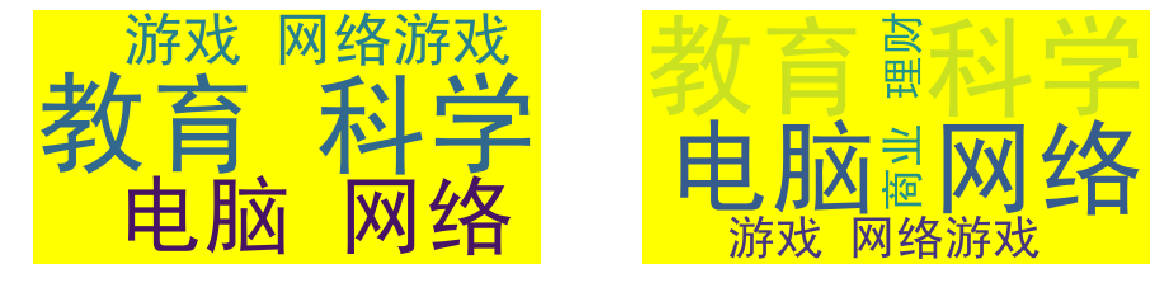

In [18]:
# 绘制种类的云图
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
train_cats_txt = ' '.join(train_cats_list)
val_cats_txt = ' '.join(val_cats_list)
wordcloud1 = WordCloud(background_color='yellow', max_font_size=400, min_font_size=20, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
wordcloud2 = WordCloud(background_color='yellow', max_font_size=400, min_font_size=20, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
train_cats_pic = wordcloud1.generate(train_cats_txt)
val_cats_pic = wordcloud2.generate(val_cats_txt)
f, axs = plt.subplots(1,2,figsize=(20,15))
plt.subplot(121)
plt.imshow(train_cats_pic)
plt.axis('off')
plt.subplot(122)
plt.imshow(val_cats_pic)
plt.axis('off')
plt.show()

In [73]:
train_cats_dict = {}
key2key = {}
for elem in train_cats:
    train_cats_dict[elem[0]] = elem[1]
# train_cats_dict

In [75]:
del_list = []
train_cats_l = list(train_cats_dict.items())
for elem in train_cats_l:
    if elem[1] < 3000:
        pos = elem[0].rfind('-')
        if pos == -1:
            continue
        key = elem[0][:pos]
        del_list.append(elem[0])
        key2key[elem[0]] = key
        if key in train_cats_dict:
            train_cats_dict[key] += elem[1]
        else:
            train_cats_dict[key] = elem[1]

print(del_list)            
            
for l in del_list:
    print(l)
    train_cats_dict.pop(l)

['游戏-巨人游戏', '游戏-久游游戏', '育儿-宝宝', '医疗健康-五官科']
游戏-巨人游戏
游戏-久游游戏
育儿-宝宝
医疗健康-五官科


In [76]:
for key, val in train_cats_dict.items():
    if val < 3000:
        print(key, '\t', val)

电子数码 	 2987
 	 1441
资源共享 	 750
烦恼 	 432
医疗健康 	 66
娱乐休闲 	 149


In [78]:
key2key_bk = {}
for key,val in key2key.items():
    if val in key2key:
        key2key_bk[key] = key2key[val]
    else:
        key2key_bk[key] = val

In [79]:
key2key_bk

{'游戏-单机游戏-仙剑奇侠传': '游戏-单机游戏',
 '游戏-网络游戏-跑跑卡丁车': '游戏-网络游戏',
 '健康-精神心理科-心理科': '健康-精神心理科',
 '商业/理财-外汇': '商业/理财',
 '生活-交通出行-问路': '生活-交通出行',
 '教育/科学-出国/留学': '教育/科学',
 '社会民生-公务办理': '社会民生',
 '健康-整形美容-眼部整形': '健康',
 '健康-皮肤科-皮肤病': '健康-皮肤科',
 '汽车-选车-车型': '汽车',
 '健康-五官科-眼科': '健康',
 '游戏-金山游戏-剑侠情缘': '游戏',
 '商业/理财-保险': '商业/理财',
 '健康-外科-骨科': '健康',
 '教育/科学-外语学习-日语': '教育/科学-外语学习',
 '健康-内科-呼吸内科': '健康',
 '游戏-巨人游戏-征途': '游戏',
 '电脑/网络-笔记本电脑': '电脑/网络',
 '生活-起名': '生活',
 '汽车-用车-驾驶技巧': '汽车',
 '游戏-网络游戏-机战': '游戏-网络游戏',
 '教育/科学-理工学科': '教育/科学',
 '教育/科学-理工学科-天文学': '教育/科学',
 '体育/运动-赛车/F1': '体育/运动',
 '教育/科学-人文学科': '教育/科学',
 '健康-中医': '健康',
 '健康-外科-肛肠外科': '健康',
 '娱乐-收藏': '娱乐',
 '教育/科学-理工学科-地球科学': '教育/科学',
 '健康-五官科-耳鼻喉科': '健康',
 '娱乐-明星-华人明星': '娱乐-明星',
 '生活-美食/烹饪-酒类/饮品': '生活-美食/烹饪',
 '教育/科学-理工学科-建筑学': '教育/科学',
 '生活-家电': '生活',
 '生活-美食/烹饪-烹饪方法': '生活-美食/烹饪',
 '教育/科学-升学入学-中考': '教育/科学',
 '健康-外科-泌尿外科': '健康',
 '生活-礼节礼仪': '生活',
 '商业/理财-贸易': '商业/理财',
 '健康-内科-心血管内科': '健康',
 '游戏-完美游戏-赤壁': '游戏',
 '游戏-电视游戏': '游戏',
 '电脑/网络-硬件-显示器': '电脑/网

In [84]:
# 将key映射表写入文件
with open('./key2key.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(key2key_bk, ensure_ascii=False))

In [ ]:
# generate train/val set for category classification
with open(trainfile, 'r', encoding='utf8') as f:
    for line in f.readlines():
        if line is None or len(line) == 0:
            continue
        j_info = json.loads(line)
        if j_info['category'] in key2key_bk:
            j_info['category'] = key2key_bk[j_info['category']]
        train_list.append(j_info)
